In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('bald_probability.csv')

In [3]:
df

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860
2,37.0,female,Employee,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,Bachelor Degree,4.0,0.418442
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050
4,38.0,male,NaN,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,Magister Degree,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,male,Employee,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,Senior High School,9.0,0.471229
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821
7914,58.0,male,NaN,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453
7915,30.0,NaN,Government Employee,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,Bachelor Degree,10.0,0.540056


In [4]:
df.head()

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860
2,37.0,female,Employee,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,Bachelor Degree,4.0,0.418442
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050
4,38.0,male,NaN,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,Magister Degree,1.0,0.368371


In [5]:
df.dtypes

age              float64
gender            object
job_role          object
province          object
salary           float64
is_married       float64
is_hereditary    float64
weight           float64
height           float64
shampoo           object
is_smoker        float64
education         object
stress           float64
bald_prob        float64
dtype: object

In [6]:
df.age


0       27.0
1       53.0
2       37.0
3       36.0
4       38.0
        ... 
7912    32.0
7913    34.0
7914    58.0
7915    30.0
7916    58.0
Name: age, Length: 7917, dtype: float64

In [7]:
df.salary.dtype

dtype('float64')

In [8]:
df.education.unique()

array(['Bachelor Degree', 'Elementary School', 'Magister Degree',
       'Senior High School', 'Junior High School', 'Doctoral Degree', nan],
      dtype=object)

In [9]:
df.shampoo.unique()

array(['Pantone', 'Moonsilk', 'Deadbuoy', 'Merpati', 'Shoulder & Head',
       nan], dtype=object)

In [10]:
df.loc[(df.bald_prob>0.5) & (df.gender=='male')]

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
7,47.0,male,Employee,Banda Aceh,4.508321e+06,1.0,0.0,74.795152,170.540938,Shoulder & Head,1.0,Magister Degree,3.0,0.540582
10,34.0,male,Government Employee,Kupang,4.765812e+06,1.0,1.0,43.657207,151.078647,Moonsilk,0.0,Bachelor Degree,2.0,0.593704
12,41.0,male,Employee,Ambon,1.939622e+07,1.0,0.0,47.959075,152.098351,Deadbuoy,1.0,Senior High School,4.0,0.614879
13,26.0,male,Employee,Tanjungselor,1.036350e+07,1.0,1.0,54.047139,175.790306,Pantone,1.0,Senior High School,1.0,0.612227
14,45.0,male,Government Employee,Tanjung Pinang,1.211718e+07,1.0,1.0,54.548239,167.855936,Moonsilk,1.0,Bachelor Degree,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,29.0,male,NaN,Samarinda,5.724630e+06,1.0,1.0,59.724999,182.450643,Shoulder & Head,1.0,Senior High School,9.0,0.709682
7910,43.0,male,Employee,Surabaya,7.495176e+06,1.0,0.0,57.817115,186.801200,Moonsilk,1.0,Senior High School,9.0,0.696782
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821
7914,58.0,male,NaN,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453


In [11]:
df.loc[(df.bald_prob>0.5) & (df.gender=='female')]

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050
5,55.0,female,Government Employee,Palangkaraya,9.213032e+06,1.0,1.0,54.287045,179.235145,Pantone,0.0,Bachelor Degree,1.0,0.732562
20,38.0,female,Employee,Kupang,6.786868e+06,1.0,1.0,65.393980,169.192650,Shoulder & Head,1.0,Junior High School,4.0,0.611850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,43.0,female,Government Employee,Tanjungselor,1.249427e+07,1.0,0.0,57.710255,173.467894,Pantone,1.0,Bachelor Degree,3.0,0.546567
7875,53.0,female,Employee,Banjarmasin,1.380929e+07,1.0,0.0,76.142136,173.048365,Merpati,0.0,Junior High School,7.0,0.663763
7882,41.0,female,Employee,Jambi,1.371359e+07,1.0,1.0,50.478430,167.416100,Shoulder & Head,0.0,Bachelor Degree,5.0,0.573601
7885,53.0,female,NaN,Gorontalo,1.109991e+07,1.0,0.0,46.280598,171.048382,Merpati,1.0,Bachelor Degree,7.0,0.584135


**So on average, we can say that males are much more susceptible to baldness than females.**

In [12]:
# so for males with baldness probability of more than 0.5 what are the mean ages for them?
df_male_bald=(df.loc[(df.bald_prob>0.5) & (df.gender=='male')])
df_male_bald.age.mean()

41.20665083135392

so for males with high probability of baldness the average age is 41.

In [13]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


<Axes: xlabel='bald_prob'>

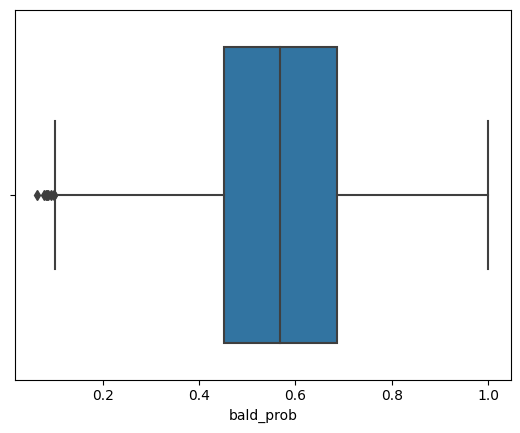

In [14]:
sns.boxplot(x=df['bald_prob'])

**if you look above on the left side there are outliers, these need to be removed.**

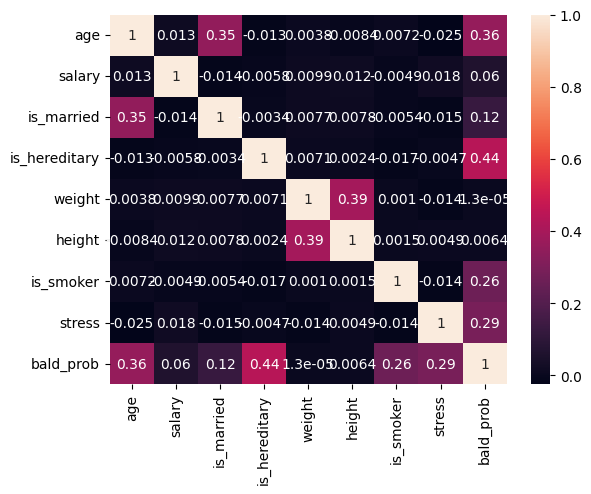

In [15]:
# looking at correlations for numerical columns only.

corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()


**looking at the correlation- an idea might be to create a new feature called BMI and finds its relation to baldness probability.**

<Axes: xlabel='stress', ylabel='bald_prob'>

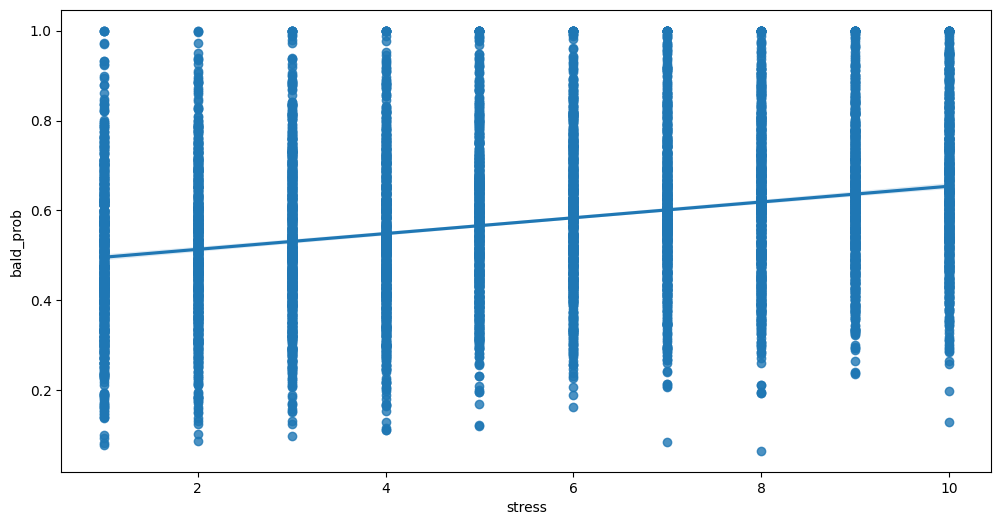

In [16]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['stress'],y=df['bald_prob'])  

In [17]:
# Check total null/NA for all columns
df.isnull().sum()

age                85
gender             77
job_role         1317
province           86
salary             74
is_married         72
is_hereditary      89
weight             56
height             74
shampoo            59
is_smoker          70
education          70
stress             64
bald_prob          79
dtype: int64

In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [19]:
newdf

,age,salary,is_married,is_hereditary,weight,height,is_smoker,stress,bald_prob
0,27.0,7.957453e+06,1.0,0.0,54.315053,170.428542,1.0,5.0,0.605974
1,53.0,7.633003e+06,1.0,0.0,72.873404,165.530097,0.0,7.0,0.532860
2,37.0,6.637625e+06,1.0,0.0,46.321533,154.599388,0.0,4.0,0.418442
3,36.0,3.624871e+06,1.0,0.0,51.539781,167.340481,1.0,9.0,0.804050
4,38.0,6.031808e+06,1.0,0.0,60.726909,165.514773,1.0,1.0,0.368371
...,...,...,...,...,...,...,...,...,...
7912,32.0,6.024409e+06,1.0,0.0,44.432438,154.578859,0.0,9.0,0.471229
7913,34.0,1.007043e+07,1.0,0.0,49.389914,158.782726,1.0,9.0,0.543821
7914,58.0,8.010815e+06,1.0,0.0,54.351968,154.478087,1.0,6.0,0.643453
7915,30.0,9.059906e+06,1.0,0.0,57.646930,163.377717,0.0,10.0,0.540056


**Most of the Exploratory data analysis is now complete, now next section which involves data cleaning, and feature engineering starts.**

In [20]:
# The first step is to remove all the missing  or null values the approach here is we are going to use sklearn's simple imputer.
from sklearn.impute import SimpleImputer

# Define SimpleImputer for numerical columns (fill missing values with mean)
numerical_imputer = SimpleImputer(strategy='mean')

# Define SimpleImputer for categorical columns (fill missing values with mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical columns
numerical_cols = ['age','salary','is_married','is_hereditary','weight','height','is_smoker','stress','bald_prob']  # List all numerical column names
categorical_cols = ['gender','job_role','province','shampoo','education']  # List all categorical column names

# Impute missing values for numerical columns
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [21]:
df

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860
2,37.0,female,Employee,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,Bachelor Degree,4.0,0.418442
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050
4,38.0,male,Employee,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,Magister Degree,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,male,Employee,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,Senior High School,9.0,0.471229
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821
7914,58.0,male,Employee,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453
7915,30.0,male,Government Employee,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,Bachelor Degree,10.0,0.540056


In [22]:
df.isnull().sum() # now no more missing values

age              0
gender           0
job_role         0
province         0
salary           0
is_married       0
is_hereditary    0
weight           0
height           0
shampoo          0
is_smoker        0
education        0
stress           0
bald_prob        0
dtype: int64

<Axes: xlabel='bald_prob'>

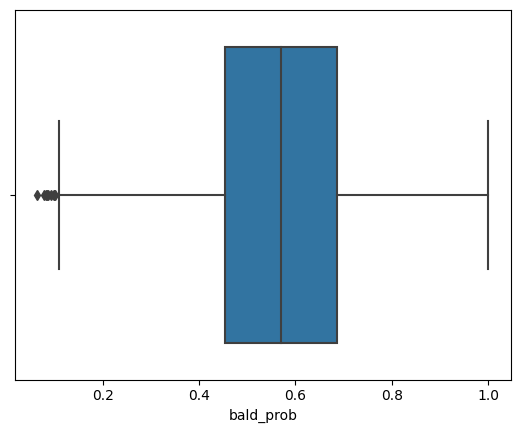

In [23]:
sns.boxplot(x=df['bald_prob']) # lets remove the outliers

In [24]:
df['BMI'] = df['weight'] / (((df['height'])/100)**2) # we are creating a  BMI feature based on height and weight

In [25]:
df

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob,BMI
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974,18.699739
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860,26.595926
2,37.0,female,Employee,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,Bachelor Degree,4.0,0.418442,19.380607
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050,18.405200
4,38.0,male,Employee,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,Magister Degree,1.0,0.368371,22.167037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,male,Employee,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,Senior High School,9.0,0.471229,18.595161
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821,19.589879
7914,58.0,male,Employee,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453,22.776213
7915,30.0,male,Government Employee,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,Bachelor Degree,10.0,0.540056,21.596856


In [26]:
df['probability'] = df['bald_prob'].apply(lambda x: 0 if x <= 0.5
                                        else 1)

In [27]:
df

,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob,BMI,probability
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974,18.699739,1
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860,26.595926,1
2,37.0,female,Employee,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,Bachelor Degree,4.0,0.418442,19.380607,0
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050,18.405200,1
4,38.0,male,Employee,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,Magister Degree,1.0,0.368371,22.167037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,male,Employee,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,Senior High School,9.0,0.471229,18.595161,0
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821,19.589879,1
7914,58.0,male,Employee,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453,22.776213,1
7915,30.0,male,Government Employee,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,Bachelor Degree,10.0,0.540056,21.596856,1


In [28]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
#object_cols.remove('province')
print(object_cols)



['gender', 'job_role', 'province', 'shampoo', 'education']


In [29]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
new_data = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

# One-hot encoding removed index; put it back
new_data.index = df.index


# Remove categorical columns (will replace with one-hot encoding)

num_data = df.drop(object_cols, axis=1)
#num_data = num_data.drop('province', axis =1)

# Add one-hot encoded columns to numerical features
new_data = pd.concat([num_data, new_data,df['probability']], axis=1)

# Ensure all columns have string type
new_data.columns = new_data.columns.astype(str)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
new_data

,age,salary,is_married,is_hereditary,weight,height,is_smoker,stress,bald_prob,BMI,...,41,42,43,44,45,46,47,48,49,probability
0,27.0,7.957453e+06,1.0,0.0,54.315053,170.428542,1.0,5.0,0.605974,18.699739,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,53.0,7.633003e+06,1.0,0.0,72.873404,165.530097,0.0,7.0,0.532860,26.595926,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,37.0,6.637625e+06,1.0,0.0,46.321533,154.599388,0.0,4.0,0.418442,19.380607,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,36.0,3.624871e+06,1.0,0.0,51.539781,167.340481,1.0,9.0,0.804050,18.405200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,38.0,6.031808e+06,1.0,0.0,60.726909,165.514773,1.0,1.0,0.368371,22.167037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,6.024409e+06,1.0,0.0,44.432438,154.578859,0.0,9.0,0.471229,18.595161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7913,34.0,1.007043e+07,1.0,0.0,49.389914,158.782726,1.0,9.0,0.543821,19.589879,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
7914,58.0,8.010815e+06,1.0,0.0,54.351968,154.478087,1.0,6.0,0.643453,22.776213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7915,30.0,9.059906e+06,1.0,0.0,57.646930,163.377717,0.0,10.0,0.540056,21.596856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
Q1 =new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age              1.300000e+01
salary           5.041027e+06
is_married       0.000000e+00
is_hereditary    0.000000e+00
weight           1.086349e+01
                     ...     
46               0.000000e+00
47               0.000000e+00
48               0.000000e+00
49               1.000000e+00
probability      1.000000e+00
Length: 62, dtype: float64


In [32]:
df_err = new_data[new_data['age'] < 10]
new_data= new_data[~new_data['age'].isin(df_err['age'])]

In [33]:
new_data.shape

(7910, 62)

In [34]:
new_data

,age,salary,is_married,is_hereditary,weight,height,is_smoker,stress,bald_prob,BMI,...,41,42,43,44,45,46,47,48,49,probability
0,27.0,7.957453e+06,1.0,0.0,54.315053,170.428542,1.0,5.0,0.605974,18.699739,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,53.0,7.633003e+06,1.0,0.0,72.873404,165.530097,0.0,7.0,0.532860,26.595926,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,37.0,6.637625e+06,1.0,0.0,46.321533,154.599388,0.0,4.0,0.418442,19.380607,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,36.0,3.624871e+06,1.0,0.0,51.539781,167.340481,1.0,9.0,0.804050,18.405200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,38.0,6.031808e+06,1.0,0.0,60.726909,165.514773,1.0,1.0,0.368371,22.167037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,6.024409e+06,1.0,0.0,44.432438,154.578859,0.0,9.0,0.471229,18.595161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7913,34.0,1.007043e+07,1.0,0.0,49.389914,158.782726,1.0,9.0,0.543821,19.589879,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
7914,58.0,8.010815e+06,1.0,0.0,54.351968,154.478087,1.0,6.0,0.643453,22.776213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7915,30.0,9.059906e+06,1.0,0.0,57.646930,163.377717,0.0,10.0,0.540056,21.596856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m_lda = LinearDiscriminantAnalysis()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Select the columns to be included
y = new_data['probability']
new_data = new_data.drop(['probability','bald_prob'],axis =1)
X = new_data
# Separate the independent variables (features) and dependent variables (target).




In [37]:
y = y.T.drop_duplicates().T # y had a duplicate probability column so dropped that.

In [38]:
y

,probability
0,1
1,1
2,0
3,1
4,0
...,...
7912,0
7913,1
7914,1
7915,1


In [39]:
X

,age,salary,is_married,is_hereditary,weight,height,is_smoker,stress,BMI,0,...,40,41,42,43,44,45,46,47,48,49
0,27.0,7.957453e+06,1.0,0.0,54.315053,170.428542,1.0,5.0,18.699739,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,53.0,7.633003e+06,1.0,0.0,72.873404,165.530097,0.0,7.0,26.595926,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,37.0,6.637625e+06,1.0,0.0,46.321533,154.599388,0.0,4.0,19.380607,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,36.0,3.624871e+06,1.0,0.0,51.539781,167.340481,1.0,9.0,18.405200,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,38.0,6.031808e+06,1.0,0.0,60.726909,165.514773,1.0,1.0,22.167037,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,6.024409e+06,1.0,0.0,44.432438,154.578859,0.0,9.0,18.595161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7913,34.0,1.007043e+07,1.0,0.0,49.389914,158.782726,1.0,9.0,19.589879,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7914,58.0,8.010815e+06,1.0,0.0,54.351968,154.478087,1.0,6.0,22.776213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7915,30.0,9.059906e+06,1.0,0.0,57.646930,163.377717,0.0,10.0,21.596856,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Split the data into training data and test data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# Build a model (in this case, Logistic Regression).
model = RandomForestClassifier(random_state=42)

# Train the model with training data.
model.fit(X_train, y_train)

# Use the model to make predictions.
y_pred = model.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Report:\n{report}')

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.865520728008089
Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       697
           1       0.88      0.92      0.90      1281

    accuracy                           0.87      1978
   macro avg       0.86      0.84      0.85      1978
weighted avg       0.86      0.87      0.86      1978



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # Add more models here as needed
}

# Dictionary to store results
results = {
    "Model": [],
    "Accuracy": []
}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

,Model,Accuracy
0,Random Forest,0.865521
1,Logistic Regression,0.647624
2,Support Vector Machine,0.647624
3,Gradient Boosting,0.867037


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X contains your features and y contains your target variable

# Initialize your classification model (for example, Random Forest)
clf = RandomForestClassifier(random_state=42)



# Define the cross-validation strategy (Stratified K-Fold is common for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation accuracy scores:", cv_scores)

# Compute and print the mean accuracy score across all folds
print("Mean accuracy:", cv_scores.mean())


clf = GradientBoostingClassifier(random_state=42)



# Define the cross-validation strategy (Stratified K-Fold is common for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation accuracy scores:", cv_scores)

# Compute and print the mean accuracy score across all folds
print("Mean accuracy:", cv_scores.mean())


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Cross-validation accuracy scores: [0.86599241 0.86156764 0.87737042 0.8539823  0.8710493 ]
Mean accuracy: 0.8659924146649811


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Cross-validation accuracy scores: [0.86852086 0.86599241 0.87610619 0.86030341 0.86725664]
Mean accuracy: 0.86763590391909


In [43]:
model=GradientBoostingClassifier(random_state=42)


model.fit(X_train, y_train)

# Use the model to make predictions.
y_pred = model.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Report:\n{report}')

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8670374115267947
Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       697
           1       0.88      0.92      0.90      1281

    accuracy                           0.87      1978
   macro avg       0.86      0.84      0.85      1978
weighted avg       0.87      0.87      0.87      1978



In [44]:
import pickle

filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

filename = 'encoder.pkl'
pickle.dump(OH_encoder, open(filename, 'wb'))

